In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rotate(point, origin, angle_deg):
    angle_rad = np.deg2rad(angle_deg)
    return (point - origin) * np.exp(1j * angle_rad) + origin

In [57]:
triangle_types = {1, 2} # type 1: for P2-tilings, type 2: for P3-tilings
shapes = {'A', 'O'} # 'A': acute equilateral triangle, 'O': obtuse equilateral triangle 
sides = {'F', 'B'} # 'F': frontside, 'B': backside
tolerance = 0.00000001

class RobinsonTriangle:
    def __init__(self, t_type, shape, side, A, B):
        if t_type not in triangle_types:
            raise ValueError('t_type must be in {}, but is {}'.format(triangle_types, t_type))
        self.t_type = t_type
        if shape not in shapes:
            raise ValueError('shape must be in {}, but is {}'.format(shapes, shape))
        self.shape = shape
        self.side = side
        if side not in sides:
            raise ValueError('side must be in {}, but is {}'.format(sides, side))
        self.side = side
        if abs(B - A) < tolerance:
            raise ValueError('points {} and {} too close'.format(A, B))
        if not isinstance(A, complex):
            raise ValueError('A must be a complex number but is {}'.format(type(A)))
        if not isinstance(B, complex):
            raise ValueError('B must be a complex number but is {}'.format(type(B)))
        self.A = A # the point at the top of the equilateral triangle as a complex number
        self.B = B # the point after A (anti-clockwise) as a complex number
        rot_angle_deg = 36 if self.shape == 'A' else 108
        self.C = rotate(B, A, rot_angle_deg)
    def __repr__(self):
        return '[t_type={}, shape={}, side={}, A={}, B={}, C={}]'.format(self.t_type, self.shape, self.side, self.A, self.B, self.C)
    def draw(self):
        plt.plot([self.A.real, self.B.real], [self.A.imag, self.B.imag], 
                 [self.A.real, self.C.real], [self.A.imag, self.C.imag], 
                 [self.B.real, self.C.real], [self.B.imag, self.C.imag],
                color='black'
                )
    def deflate(self):
        if self.t_type == 1:
            raise NotImplementedError('deflation for t_type 1 is not implemented yet')
        elif self.t_type == 2:
            if self.shape == 'A':
                if self.side == 'F':
                    D = rotate(self.C, self.B, 36)
                    return [
                        RobinsonTriangle(self.t_type, 'A', 'F', self.B, self.C),
                        RobinsonTriangle(self.t_type, 'O', 'B', D, self.A),
                    ] 
                elif self.side == 'B':
                    D = rotate(self.B, self.C, 360 - 36)
                    return [
                        RobinsonTriangle(self.t_type, 'O', 'F', D, self.C),
                        RobinsonTriangle(self.t_type, 'A', 'B', self.C, D),
                    ] 
            elif self.shape == 'O':
                if self.side == 'F':
                    P = rotate(self.A, self.B, 360 - 36)
                    Q = rotate(self.A, P, 36)
                    return [
                        RobinsonTriangle(self.t_type, 'O', 'B', Q, self.B),
                        RobinsonTriangle(self.t_type, 'A', 'F', P, self.A),
                        RobinsonTriangle(self.t_type, 'O', 'F', P, self.C),
                    ]
                elif self.side == 'B':
                    P = rotate(self.A, self.C, 36)
                    Q = rotate(self.A, P, 360 - 36)
                return [
                        RobinsonTriangle(self.t_type, 'O', 'F', Q, P),
                        RobinsonTriangle(self.t_type, 'A', 'B', P, Q),
                        RobinsonTriangle(self.t_type, 'O', 'B', P, self.A),
                    ]
            

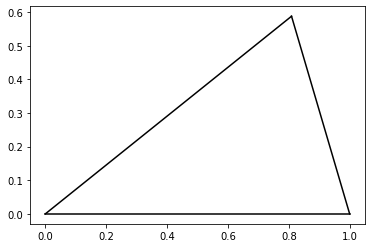

In [51]:
rt1 = RobinsonTriangle(2, 'A', 'F', complex(0), complex(1))
rt1.draw()

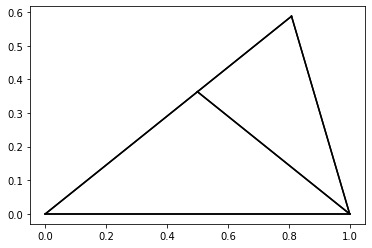

In [52]:
rt1.draw()
for t in rt1.deflate():
    t.draw()
plt.show()

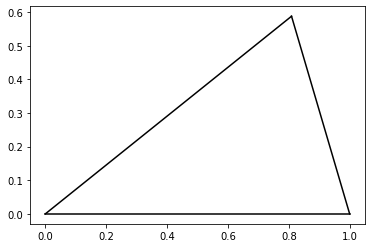

In [53]:
rt2 = RobinsonTriangle(2, 'A', 'B', complex(0), complex(1))
rt2.draw()

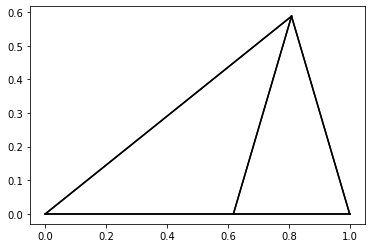

In [54]:
rt2.draw()
for t in rt2.deflate():
    t.draw()
plt.show()

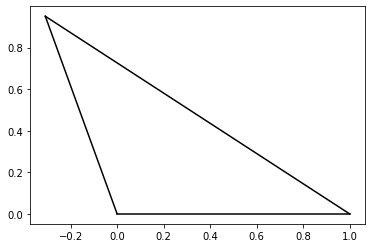

In [55]:
rt3 = RobinsonTriangle(2, 'O', 'F', complex(0), complex(1))
rt3.draw()

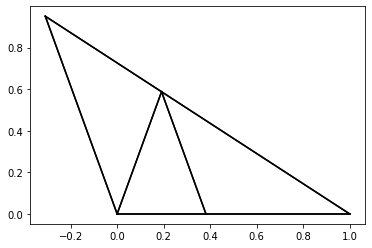

In [56]:
rt3.draw()
for t in rt3.deflate():
    t.draw()
plt.show()

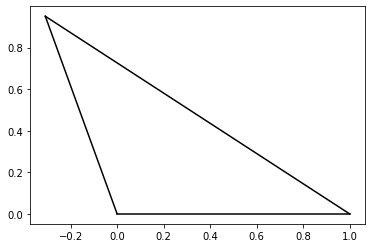

In [58]:
rt4 = RobinsonTriangle(2, 'O', 'B', complex(0), complex(1))
rt4.draw()

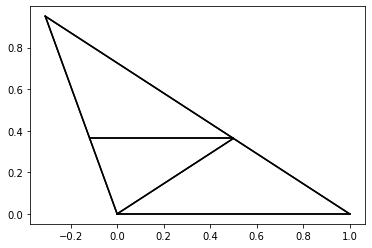

In [59]:
rt4.draw()
for t in rt4.deflate():
    t.draw()
plt.show()

In [68]:
def deflate_triangles(rts):
    res = []
    for rt in rts:
        res += rt.deflate()
    return res

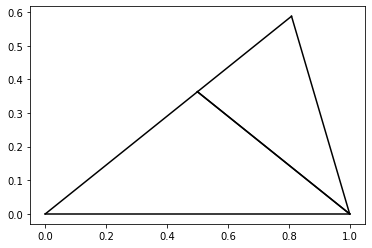

In [69]:
iter1 = deflate_triangles([rt1])
for t in iter1:
    t.draw()
plt.show()

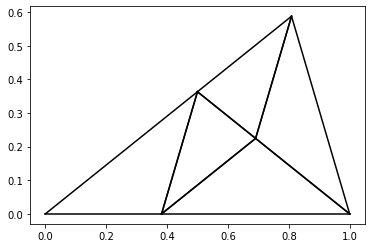

In [70]:
iter2 = deflate_triangles(iter1)
for t in iter2:
    t.draw()
plt.show()

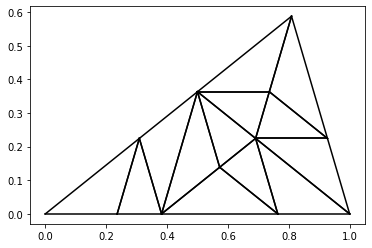

In [71]:
iter3 = deflate_triangles(iter2)
for t in iter3:
    t.draw()
plt.show()

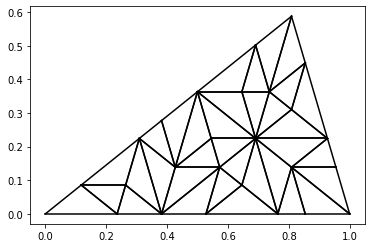

In [72]:
iter4 = deflate_triangles(iter3)
for t in iter4:
    t.draw()
plt.show()

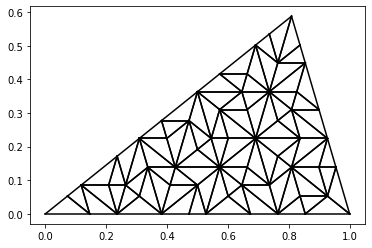

In [73]:
iter5 = deflate_triangles(iter4)
for t in iter5:
    t.draw()
plt.show()

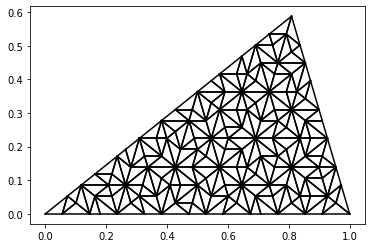

In [74]:
iter6 = deflate_triangles(iter5)
for t in iter6:
    t.draw()
plt.show()

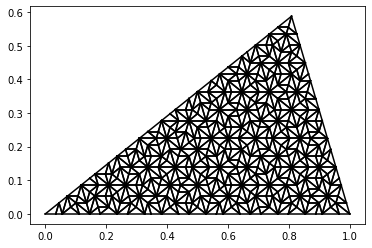

In [75]:
iter7 = deflate_triangles(iter6)
for t in iter7:
    t.draw()
plt.show()

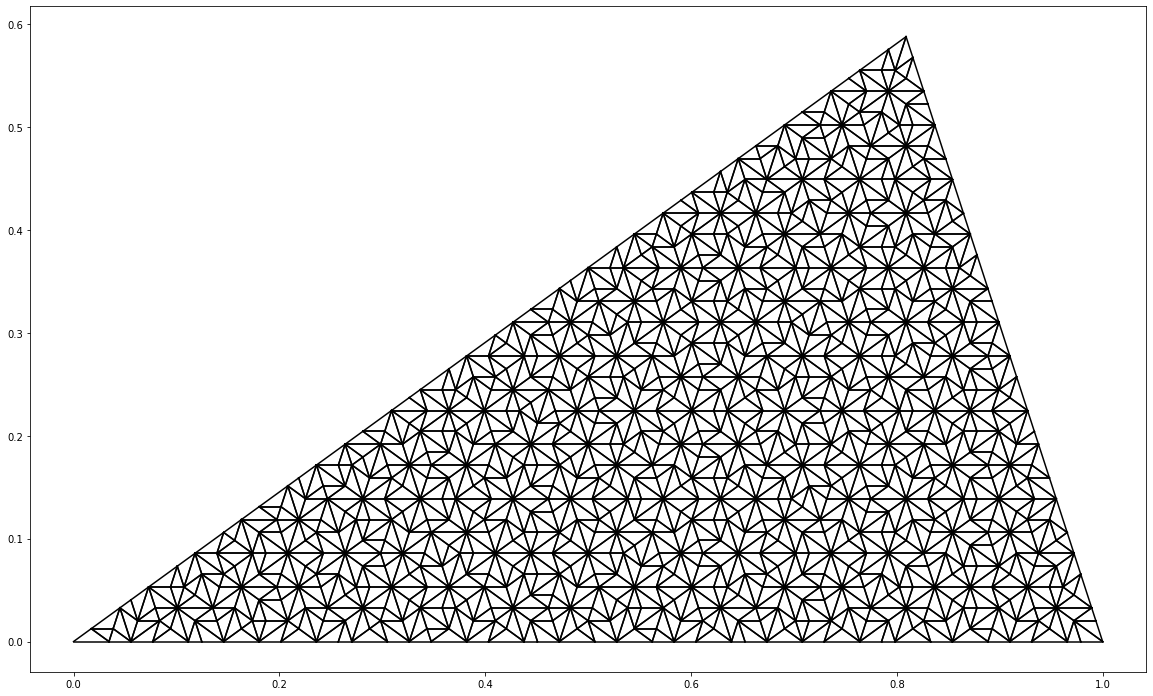

In [102]:
plt.figure(figsize=(20, 20 * 0.612))
plt.axis('equal')
iter8 = deflate_triangles(iter7)
for t in iter8:
    t.draw()
plt.savefig('first_tiling.svg')
plt.show()

In [85]:
def deflate(first_rt, iter_depth=5):
    res = [first_rt]
    for i in range(iter_depth):
        res = deflate_triangles(res)
    return res

In [117]:
list(range(0))

[]

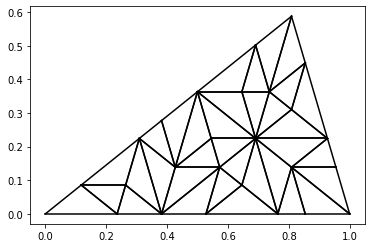

In [126]:
res = deflate(rt1, iter_depth=4)
for t in res:
    t.draw()
plt.savefig('first_tiling.svg')
plt.show()

In [127]:
def is_neighbour(rt1, rt2):
    if abs(rt1.A - rt2.A) < tolerance:
        if abs(rt1.B - rt2.C) < tolerance:
            return True
    if abs(rt1.A - rt2.B) < tolerance:
        if abs(rt1.B - rt2.A) < tolerance:
            return True
    if abs(rt1.A - rt2.C) < tolerance:
        if abs(rt1.B - rt2.B) < tolerance:
            return True
    if abs(rt1.B - rt2.A) < tolerance:
        if abs(rt1.C - rt2.C) < tolerance:
            return True
    if abs(rt1.B - rt2.B) < tolerance:
        if abs(rt1.C - rt2.A) < tolerance:
            return True
    if abs(rt1.B - rt2.C) < tolerance:
        if abs(rt1.C - rt2.B) < tolerance:
            return True
    if abs(rt1.C - rt2.A) < tolerance:
        if abs(rt1.A - rt2.C) < tolerance:
            return True
    if abs(rt1.C - rt2.B) < tolerance:
        if abs(rt1.A - rt2.A) < tolerance:
            return True
    if abs(rt1.C - rt2.C) < tolerance:
        if abs(rt1.A - rt2.B) < tolerance:
            return True
    return False

In [130]:
n = len(res)
print(n)
neigbouring_triangles = []
for i in range(n):
    for j in range(i, n):
        if is_neighbour(res[i], res[j]):
            neigbouring_triangles += [res[i], res[j]]
print(len(neigbouring_triangles))

34
86
